<a href="https://colab.research.google.com/github/lukitasmois/2162-clasificacion-validacion-de-modelos-y-metricas/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [25]:
import pandas as pd
datos = pd.read_csv('https://raw.githubusercontent.com/lukitasmois/2162-clasificacion-validacion-de-modelos-y-metricas/refs/heads/main/prestacar.csv')

In [26]:
datos.head()

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [27]:
X = datos.drop(columns='moroso')
y = datos.moroso

In [28]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X,y)
modelo.score(X,y)

1.0

In [29]:
print(f'La exactitud del modelo es: {modelo.score(X,y)}')

La exactitud del modelo es: 1.0


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)

In [32]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
print(f'La exactitud del modelo con datos de entrenamiento es: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con datos de validacion es: {modelo.score(X_val,y_val)}')

La exactitud del modelo con datos de entrenamiento es: 1.0
La exactitud del modelo con datos de validacion es: 0.8484698914116485


In [33]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)
print(f'La exactitud del modelo con datos de entrenamiento es: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con datos de validacion es: {modelo.score(X_val,y_val)}')

La exactitud del modelo con datos de entrenamiento es: 0.9192744060451645
La exactitud del modelo con datos de validacion es: 0.9079466929911155


### Evaluando el modelo

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
y_predict = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val ,y_predict)
print(matriz_confusion)

[[7338   59]
 [ 687   20]]


In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

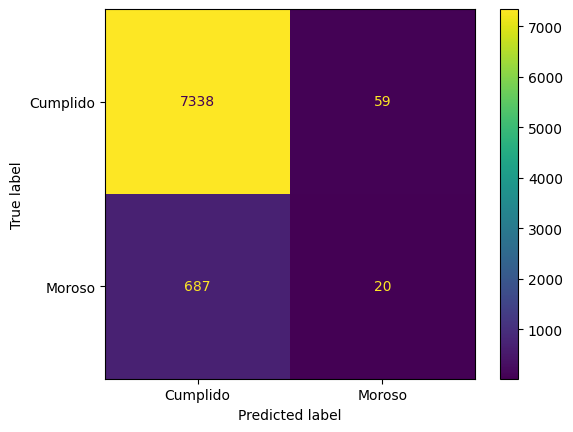

In [37]:
visualizer = ConfusionMatrixDisplay(matriz_confusion, display_labels=['Cumplido', 'Moroso'])
visualizer.plot();

Para obtener una evaluación más completa del desempeño de modelos de clasificación, podemos utilizar una herramienta conocida como matriz de confusión. Esta matriz ofrece ventajas a la persona científica de datos, ya que permite entender cuántos errores y aciertos tiene las predicciones de un modelo. En lugar de una tasa de acierto general, la matriz es capaz de proporcionar información en una visualización para cada una de las categorías de la variable objetivo.

Piensa en un sistema de seguridad de un edificio que utiliza cámaras para identificar personas que entran. La "matriz de confusión" se vuelve valiosa, ya que permite verificar cuántas veces el sistema acertó al identificar correctamente a las personas autorizadas, cuántas veces acusó erróneamente a personas y cuántas veces dejó pasar a personas no autorizadas. Con estos números, es posible ajustar el sistema para minimizar falsos positivos y negativos, mejorando su precisión en la detección de visitantes.

En la representación general de una matriz de confusión, para más detalles analiza la imagen a continuación, las filas de la matriz corresponden a los valores reales de la base de datos, mientras que las columnas corresponden a los valores previstos por el modelo de clasificación. Las categorías de la variable objetivo están representadas por el valor 0 (ausencia del atributo), también llamado negativo, y por el valor 1 (presencia del atributo), también llamado positivo.
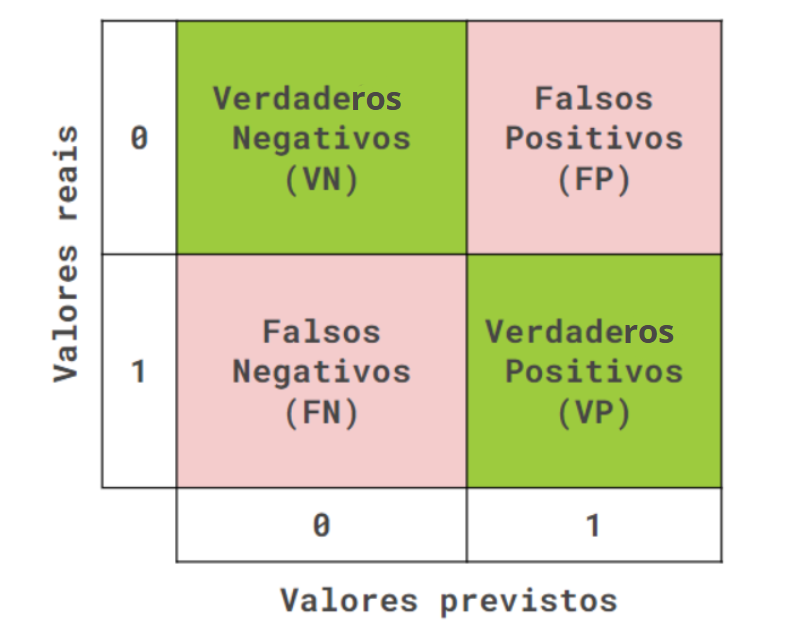

Cada elemento de la matriz está identificado por un nombre de acuerdo con la intersección entre la predicción y el valor real. La diagonal principal de la matriz, que está destacada por el color verde, representa los elementos que tienen la predicción igual al valor real, por lo tanto son los aciertos del modelo. Por otro lado, la diagonal secundaria, que está destacada por el color rojo, representa los elementos con predicciones diferentes del valor real, por lo tanto son los errores del modelo. La descripción de cada uno de los elementos es la siguiente:

* **Verdaderos Negativos (VN):** Cuando el valor real es 0 y la predicción también es 0. Indica que el modelo clasificó correctamente los valores de la clase negativa.

* **Falsos Positivos (FP):** Cuando el valor real es 0 y la predicción es 1. Indica que el modelo clasificó erróneamente un elemento de la clase negativa como si fuera de la clase positiva.

* **Falsos Negativos (FN):** Cuando el valor real es 1 y la predicción es 0. Indica que el modelo clasificó erróneamente un elemento de la clase positiva como si fuera de la clase negativa.

* **Verdaderos Positivos (VP):** Cuando el valor real es 1 y la predicción también es 1. Indica que el modelo clasificó correctamente los valores de la clase positiva.

Estos valores son muy útiles para un análisis más profundo del modelo de clasificación. Esto permite identificar las capacidades y limitaciones de la predicción, si hay un equilibrio entre los aciertos y errores o si el resultado está sesgado hacia una clase en detrimento de la otra. Con esto, es evidente que la matriz de confusión es una herramienta mucho más completa que la métrica de precisión, que representa solo el porcentaje de aciertos del modelo, sin considerar las clases de manera aislada.


# 💪 Practica 💪

Se recomienda utilizar más de un modelo de clasificación en proyectos de machine learning, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempeño, después de todos los análisis y mejoras.

Utilizamos durante la clase el algoritmo de árbol de decisión, pero la biblioteca Scikit-Learn tiene varios otros métodos de clasificación que pueden ser utilizados en nuestro proyecto. Como desafío, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempeño con la precisión y la matriz de confusión, y compara los resultados con el resultado del árbol de decisión.

Como un consejo, revisa la documentación del algoritmo [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier). Explora este material y observa cómo importar la función. Durante este proceso, recuerda verificar los parámetros del método para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
random_forest = RandomForestClassifier(max_depth=10)

random_forest.fit(X_train, y_train)
random_forest.score(X_val, y_val)

0.9130059230009872

In [40]:
from sklearn.metrics import confusion_matrix

In [42]:
y_predict_forest = random_forest.predict(X_val)

confusion_matrix_forest = confusion_matrix(y_val, y_predict_forest)
print(confusion_matrix_forest)

[[7395    2]
 [ 703    4]]


In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

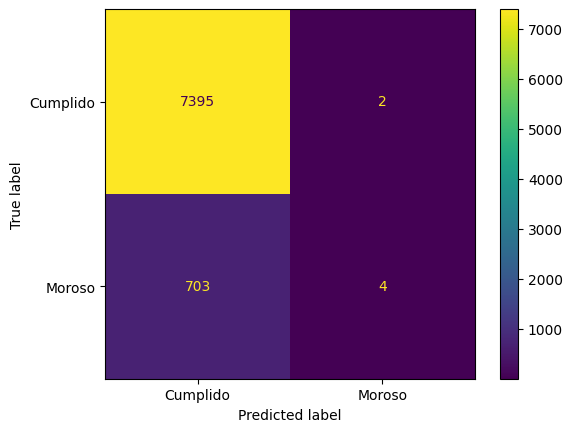

In [44]:
visualizer_forest = ConfusionMatrixDisplay(confusion_matrix_forest, display_labels=['Cumplido', 'Moroso'])
visualizer_forest.plot();

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

### Curva ROC

In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




### Curva de  precisión x sensibilidad

In [ ]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


### Informe de métricas

## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

### Validación cruzada con sensibilidad

### Estratificando los datos

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

### Pipeline para validación

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

### Probando el modelo